In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import *
from collections import Counter
import seaborn as sns
import tqdm
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
IMAGE_DIR = 'image_contest_level_2'

# 读取数据集

In [2]:
df = pd.read_csv('image_contest_level_2/labels.txt', sep=' ', header=None)
df.head()

,0,1
0,流=42072;圳=86;(圳-(97510*45921))*流/35864,-5.252849e+09
1,回=38093;铁=50521;铁*(4560-64206-回/47726),-3.013416e+09
2,到=37808;(10220+到/78589)*(70612*88431),6.381965e+13
3,不=87863;42263*57806-不/76028*38980,2.443010e+09
4,到=94310;锁=61045;((63526+锁)-21038)*到/81905,1.192137e+05


# 统计字符串长度

In [3]:
lens = np.array(map(lambda x:len(x.split(';')[1]), df[0]))

In [4]:
lens.min(), lens.max()

(5, 32)

# 统计出现次数

In [5]:
c = Counter(''.join([x.decode('utf-8') for x in df[0]]))
d = pd.DataFrame(c.most_common(), columns=['word', 'count'])
d.head()

,word,count
0,4,250828
1,7,250482
2,3,250408
3,5,250002
4,8,249932


# 画柱状图

4 7 3 5 8 9 6 1 2 0 ; = ) ( - / + * 不 锁 圳 深 烧 塘 柳 池 板 铁 烟 回 流 黄 复 上 之 君 来 奔 水 天 海 河 到 见


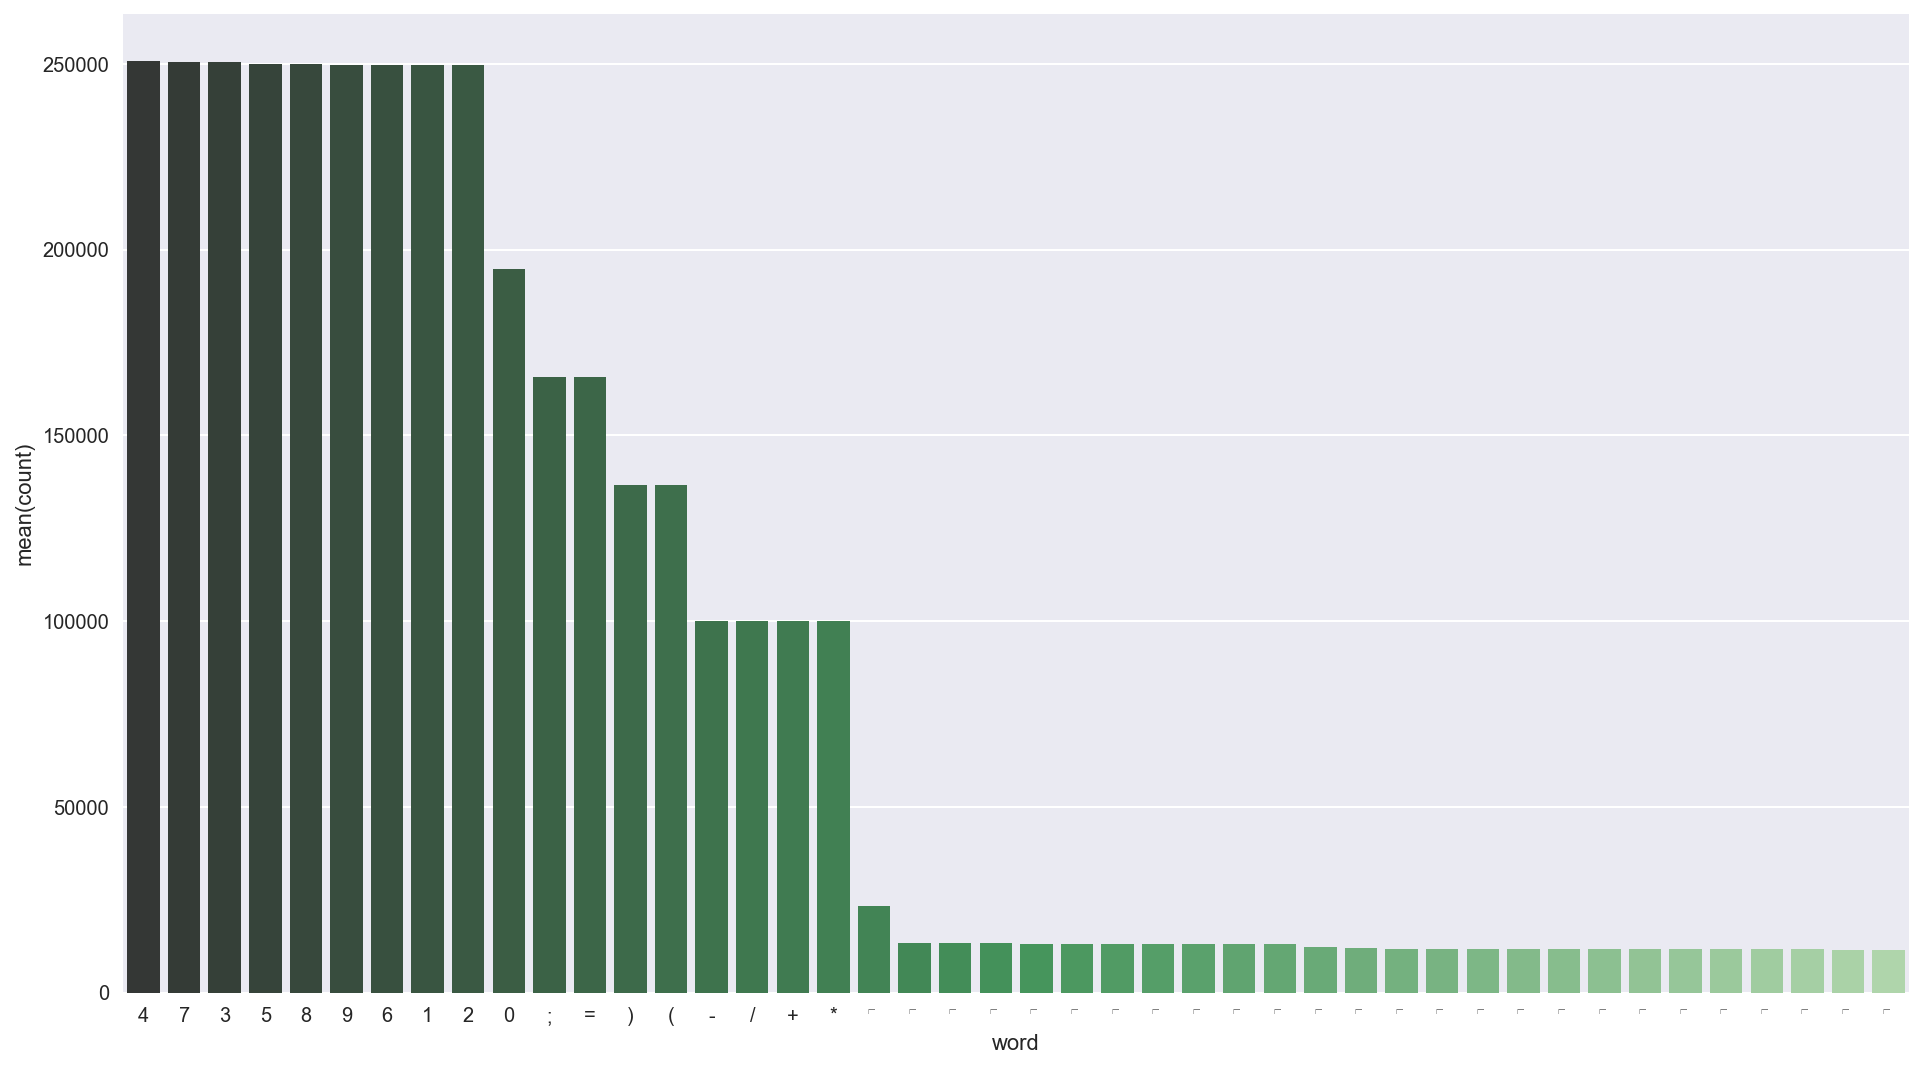

In [6]:
plt.figure(figsize=(16, 9))
sns.barplot(d['word'], d['count'], palette="Greens_d")
print ' '.join(d['word'])

# 计算出现频率

In [7]:
n = len(df)
for i in d.index:
    print d['word'][i], d['count'][i] / float(n)

4 2.50828
7 2.50482
3 2.50408
5 2.50002
8 2.49932
9 2.49755
6 2.49637
1 2.49601
2 2.4955
0 1.94757
; 1.65807
= 1.65807
) 1.36505
( 1.36505
- 1.00065
/ 1.0
+ 0.9997
* 0.99965
不 0.23194
锁 0.13332
圳 0.13294
深 0.1324
烧 0.13206
塘 0.13188
柳 0.13156
池 0.13094
板 0.13094
铁 0.1305
烟 0.1296
回 0.12274
流 0.11972
黄 0.11858
复 0.11854
上 0.1185
之 0.11848
君 0.1181
来 0.11754
奔 0.1175
水 0.11718
天 0.1171
海 0.11662
河 0.11624
到 0.11586
见 0.11536


# 猜括号生成方式

In [6]:
1+1+1+1

(1+1)+1+1
1+(1+1)+1
1+1+(1+1)
(1+1+1)+1
1+(1+1+1)

((1+1)+1)+1
(1+(1+1))+1

1+((1+1)+1)
1+(1+(1+1))

(1+1)+(1+1)

4

In [7]:
2*5/11.0+5/11.0

1.3636363636363635

# 画出运算符相关系数

In [8]:
data = {}
for c in '=+-*(':
    data[c] = [x.count(c) for x in df[0]]

df2 = pd.DataFrame(data)
df2.corr()

,(,*,+,-,=
(,1.000000,-0.001547,-0.000878,0.002427,0.004964
*,-0.001547,1.000000,-0.500745,-0.500644,-0.003324
+,-0.000878,-0.500745,1.000000,-0.498609,0.006420
-,0.002427,-0.500644,-0.498609,1.000000,-0.003092
=,0.004964,-0.003324,0.006420,-0.003092,1.000000


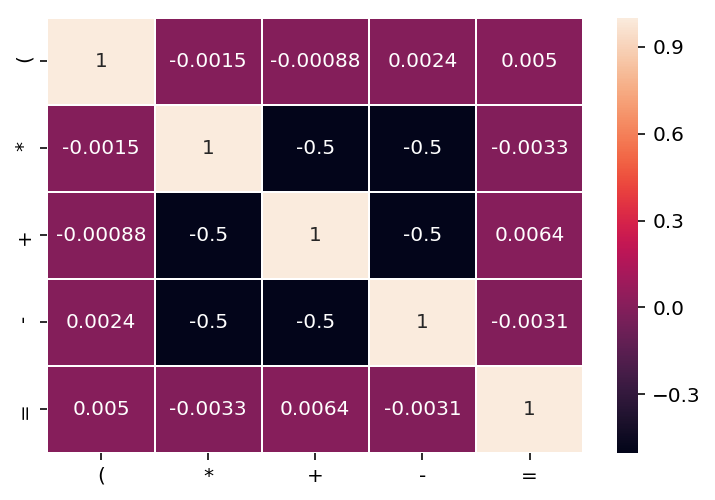

In [9]:
sns.heatmap(df2.corr(), annot=True, linewidths=.5)

# 猜测生成方式

In [10]:
test = np.random.randint(3, size=(10000, 3))
test

array([[0, 1, 1],
       [0, 1, 1],
       [0, 2, 0],
       ..., 
       [2, 0, 2],
       [0, 2, 2],
       [1, 2, 0]])

In [11]:
data = {}
for i in range(3):
    data[i] = np.count_nonzero(test == i, axis=-1)

df2 = pd.DataFrame(data)
df2.corr()

,0,1,2
0,1.000000,-0.495757,-0.506633
1,-0.495757,1.000000,-0.497587
2,-0.506633,-0.497587,1.000000


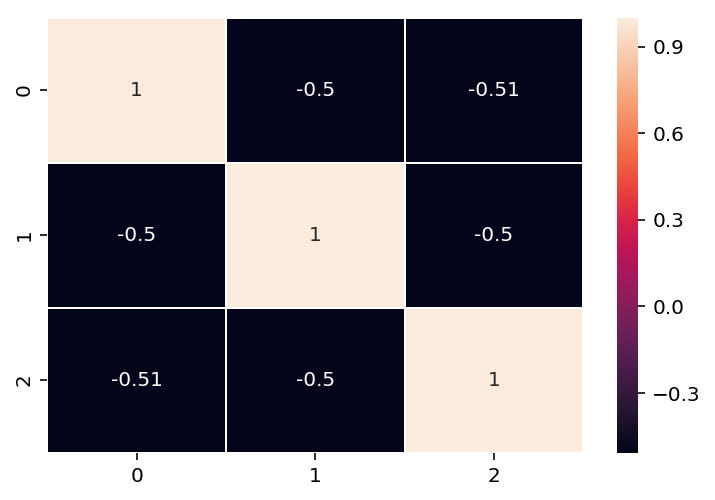

In [12]:
sns.heatmap(df2.corr(), annot=True, linewidths=.5)